<a href="https://colab.research.google.com/github/don3tan/MLCodingChallenge/blob/master/SVM_HOG_Testing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
90.649
Plan:

1. Download Dataset
2. Reduce Datasize to 10000 for testing
3. Normalize data
4. HOG features / SIFT features

In [0]:
#imports
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt


In [0]:
random_seed = 42

In [0]:
#1. Load data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# read .csv files
train_df = pd.read_csv('../content/drive/My Drive/fashion-mnist_train.csv')
test_df = pd.read_csv('../content/drive/My Drive/fashion-mnist_test.csv')

In [0]:
#define INITIAL x_train, y_train, x_test, y_test & 'normalizing' by division by 255
x_train = train_df.drop('label', axis = 1).to_numpy(dtype = 'int')
y_train = train_df['label'].to_numpy()

x_test = test_df.drop('label', axis = 1).to_numpy(dtype = 'int')
y_test = test_df['label'].to_numpy()

In [0]:
#take less data
x_train = x_train[:10000]
y_train = y_train[:10000]

x_test = x_test[:2000]
y_test = y_test[:2000]

In [0]:
x_train_features = []
x_train_image = []

for i, image in enumerate(x_train):

  train_features, train_images = hog(x_train[i].reshape(28,28), orientations = 4, pixels_per_cell = (7,7), cells_per_block = (1,1), visualize = True, transform_sqrt = True)
  x_train_features.append(train_features)
  x_train_image.append(train_images)

  if i % 10000 == 0:
    print('[LOG] {} features of training image {} succesfully extracted.'.format(str(len(train_features)), str(i).zfill(5)))

[LOG] 64 features of training image 00000 succesfully extracted.
[LOG] 64 features of training image 10000 succesfully extracted.
[LOG] 64 features of training image 20000 succesfully extracted.
[LOG] 64 features of training image 30000 succesfully extracted.
[LOG] 64 features of training image 40000 succesfully extracted.
[LOG] 64 features of training image 50000 succesfully extracted.


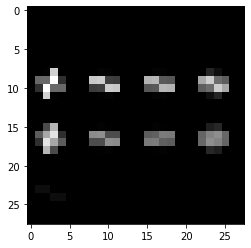

In [0]:
plt.imshow(x_train_image[1000], cmap='gray')

In [0]:
x_test_features = []
x_test_image = []

for i, image in enumerate(x_test):

  test_features, test_images = hog(x_test[i].reshape(28,28), orientations = 4, pixels_per_cell = (7,7), cells_per_block = (1,1), visualize = True, transform_sqrt = True)
  x_test_features.append(test_features)
  x_test_image.append(test_images)

  if i % 1000 == 0:
    print('[LOG] {} features of testing image {} succesfully extracted.'.format(str(len(test_features)), str(i).zfill(5)))

[LOG] 64 features of testing image 00000 succesfully extracted.
[LOG] 64 features of testing image 01000 succesfully extracted.
[LOG] 64 features of testing image 02000 succesfully extracted.
[LOG] 64 features of testing image 03000 succesfully extracted.
[LOG] 64 features of testing image 04000 succesfully extracted.
[LOG] 64 features of testing image 05000 succesfully extracted.
[LOG] 64 features of testing image 06000 succesfully extracted.
[LOG] 64 features of testing image 07000 succesfully extracted.
[LOG] 64 features of testing image 08000 succesfully extracted.
[LOG] 64 features of testing image 09000 succesfully extracted.


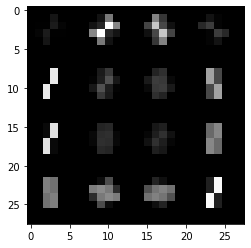

In [0]:
plt.imshow(x_test_image[1000], cmap='gray')

In [0]:
#possibly powertransforming features?
x_train = PowerTransformer().fit_transform(x_train_features)
x_test = PowerTransformer().fit_transform(x_test_features)

In [0]:
#try fitting with the so far proven classifier
svm = SVC(kernel = 'rbf', C = 6.5, gamma = 'auto', random_state = 123, cache_size = 8192)

svm.fit(x_train_features, y_train)


SVC(C=6.5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
prediction = svm.predict(x_test_features)



In [0]:
print('Accuracy: {}%'.format(str(accuracy_score(y_test, prediction) * 100)))

Accuracy: 80.35%


Text(0.5, 1.0, 'SVM Predictions - Confusion Matrix')

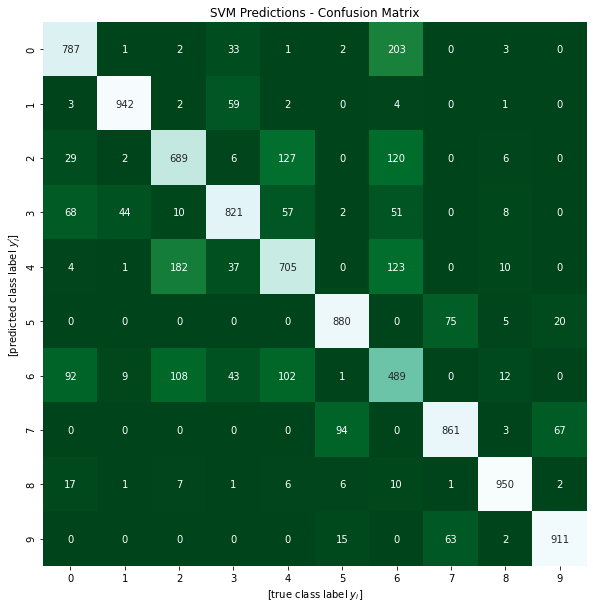

In [0]:
labels_dict = {0: "T-shirt/top",
               1: "Trouser",
               2: "Pullover",
               3: "Dress",
               4: "Coat",
               5: "Sandal",
               6: "Shirt",
               7: "Sneaker",
               8: "Bag",
               9: "Ankle boot"}

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

matrix = confusion_matrix(y_test, prediction)

plt.figure(figsize=(10, 10))

# plot confusion matrix heatmap
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r', xticklabels=labels_dict, yticklabels=labels_dict)

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')

# add plot title
plt.title('SVM Predictions - Confusion Matrix')

without hog

In [0]:
#Finding the best possible combination of everything

normalizers = ['StandardScaler', 'PowerTransformer']

classifier = SVC(random_state = 123, cache_size = 8192)

parameters = {'kernel':('rbf', 'poly', 'sigmoid'), 'C':[1, 5, 8, 9, 10, 11, 12, 15], 'gamma':['auto', 'scale']}

for normalizer in normalizers:
  if normalizer == 'StandardScaler':
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
  else:
    x_train = PowerTransformer().fit_transform(x_train)
    x_test = PowerTransformer().fit_transform(x_test)
  print('Normalizer used:', normalizer)

  #####################################################
  #########    INSERT HOG FEATURES HERE      ########## 
  #####################################################

  #GridSearching the best Kernel-parameter combination
  clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)
  clf.fit(x_train, y_train)
  print(clf.best_estimator_)
  print(clf.best_params_)
  print(clf.best_score_)



Normalizer used: StandardScaler
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 40

SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)
{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}
0.8727
Normalizer used: PowerTransformer
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 41

SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)
{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}
0.8762000000000001


In [0]:
normalizers = ['StandardScaler', 'PowerTransformer']

classifier = SVC(random_state = 123, cache_size = 8192)

parameters = {'kernel':('rbf', 'poly', 'sigmoid'), 'C':[1, 5, 8, 9, 10, 11, 12, 15], 'gamma':['auto', 'scale']}

for normalizer in normalizers:
  if normalizer == 'StandardScaler':
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
  else:
    x_train = PowerTransformer().fit_transform(x_train)
    x_test = PowerTransformer().fit_transform(x_test)
  print('Normalizer used:', normalizer)

  #####################################################
  #########    INSERT HOG FEATURES HERE      ########## 
  #####################################################

  #GridSearching the best Kernel-parameter combination
  clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)
  clf.fit(x_train, y_train)
  print(clf.best_estimator_)
  print(clf.best_params_)
  print(clf.best_score_)

In [0]:
x_train = PowerTransformer().fit_transform(x_train)
x_test = PowerTransformer().fit_transform(x_test)

In [0]:
x_train[1]

In [0]:
#test best rbf estimator vs poly gridsearching

classifier = SVC(kernel = 'poly', random_state = 123, cache_size = 8192)

parameters = {'C': [1, 5, 8, 9, 10, 11, 12, 15], 'degree': [3, 4, 5 ,6], 'gamma':['auto', 'scale']}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 10, n_jobs = -1)
clf.fit(x_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 53.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 60.8min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 68

SVC(C=15, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)
{'C': 15, 'degree': 3, 'gamma': 'scale'}
0.8734


In [0]:
clf.best_estimator_

SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
clf.best_estimator_

SVC(C=5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
#the best so far?
classifier = SVC(kernel = 'rbf', gamma = 'auto', random_state = 123, cache_size = 8192, degree = 3)

parameters = {'C': [6, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7]}

clf = GridSearchCV(classifier, param_grid = parameters, verbose = 20, n_jobs = -1)
clf.fit(x_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  5

SVC(C=6.5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)
{'C': 6.5}
0.8764999999999998


In [0]:
prediction = svm.predict(x_test)

In [0]:
print('Accuracy: {}%'.format(str(accuracy_score(y_test, prediction) * 100)))

Accuracy: 86.25%


In [0]:
labels_dict = {0: "T-shirt/top",
               1: "Trouser",
               2: "Pullover",
               3: "Dress",
               4: "Coat",
               5: "Sandal",
               6: "Shirt",
               7: "Sneaker",
               8: "Bag",
               9: "Ankle boot"}

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

matrix = confusion_matrix(y_test, prediction)

plt.figure(figsize=(10, 10))

# plot confusion matrix heatmap
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r', xticklabels=labels_dict, yticklabels=labels_dict)

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')

# add plot title
plt.title('SVM Predictions - Confusion Matrix')

In [0]:
#hog feature implementation

In [0]:
svm = SVC(kernel = 'rbf', C = 6.5, gamma = 'auto', random_state = 123, cache_size = 8192)

svm.fit(x_train, y_train)

SVC(C=6.5, break_ties=False, cache_size=8192, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
prediction = svm.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
print('Accuracy: {}%'.format(str(accuracy_score(y_test, prediction) * 100)))

Accuracy: 90.63%


In [0]:
labels_dict = {0: "T-shirt/top",
               1: "Trouser",
               2: "Pullover",
               3: "Dress",
               4: "Coat",
               5: "Sandal",
               6: "Shirt",
               7: "Sneaker",
               8: "Bag",
               9: "Ankle boot"}

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

matrix = confusion_matrix(y_test, prediction)

plt.figure(figsize=(10, 10))

# plot confusion matrix heatmap
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r', xticklabels=labels_dict, yticklabels=labels_dict)

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')

# add plot title
plt.title('SVM Predictions - Confusion Matrix')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

> HOG

